##### Name : Vakeesan
##### Index No. : 190643G

##### 1)

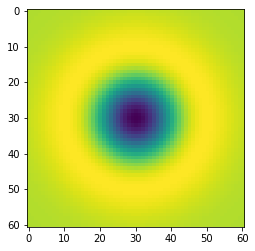

In [67]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 10
hw = 3*sigma
X,Y = np.meshgrid(np.arange(-hw,hw+1,1),np.arange(-hw,hw+1,1))
log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) +Y**2/(sigma**2) - 2)*np.exp(-(X**2+Y**2)/(2*sigma**2))
plt.imshow(log)

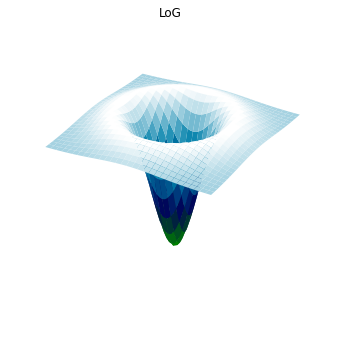

In [70]:
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt


fig= plt.figure(figsize=(6,6))
ax = fig.add_subplot( projection='3d')
ax.plot_surface(X,Y,log, cmap=cm.ocean)
ax.set_title("LoG")

plt.axis("off")
plt.show()

#### 2)

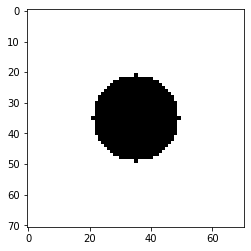

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

w, h =71,71
hw = w//2
hh = h//2

f=np.ones((h,w), dtype=np.float32)*255
X,Y = np.meshgrid(np.arange(-hh,hh+1,1),np.arange(-hw,hw+1,1))

r = w//5 #14
f *=X**2 +Y**2 > r**2
plt.imshow(f,cmap="gray")


(35, 35, 5)
10


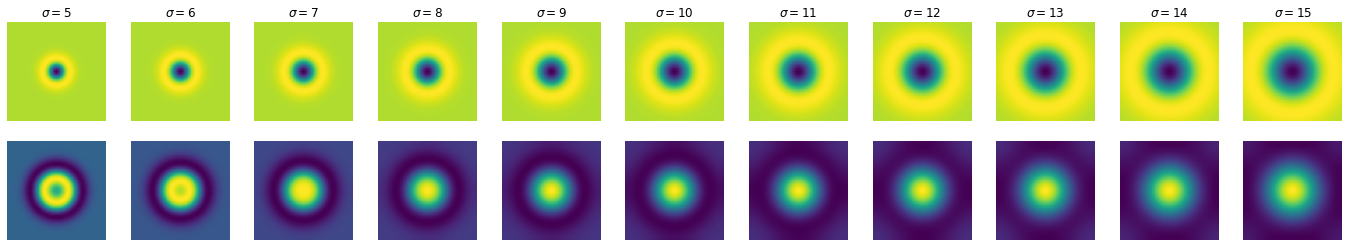

In [74]:
s = 11
fig,ax  = plt.subplots(2,s, figsize=(24,4))
scale_space = np.empty((h,w,s), dtype=np.float32)
sigmas= np.arange(5,16,1)
for i, sigma  in enumerate(np.arange(5,16,1)):
    loh_hw = 3*sigma
    X,Y = np.meshgrid(np.arange(-hw,hw+1,1),np.arange(-hw,hw+1,1))
    log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) +Y**2/(sigma**2) - 2)*np.exp(-(X**2+Y**2)/(2*sigma**2))
    f_log = cv.filter2D(f,-1,log)
    scale_space[:,:,i]= f_log
    ax[0,i].imshow(log)
    ax[0,i].axis('off')
    ax[0,i].set_title("$\sigma = {}$".format(sigma))
    ax[1,i].imshow(f_log)
    ax[1,i].axis('off')
indices = np.unravel_index(np.argmax(scale_space, axis=None),scale_space.shape)
print(indices)
print(sigmas[indices[2]])

#### 3)

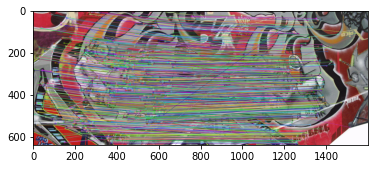

(<matplotlib.image.AxesImage at 0x1bb4ea42fd0>, None)

In [75]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread(r'C:\Python39\cv\exercices\lec 5\img1.ppm',cv.IMREAD_COLOR)          # queryImage
img2 = cv.imread(r'C:\Python39\cv\exercices\lec 5\img2.ppm',cv.IMREAD_COLOR) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(cv.cvtColor(img3,cv.COLOR_BGR2RGB)),plt.show()

#### 4)

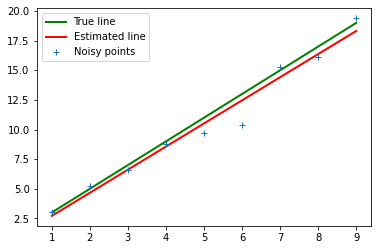

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

m = 2 # Line equation : y = m*x + c . m i s the s lope . c i s the int e r c ept .
c = 1
x = np.arange(1 ,10 , 1)
np.random.seed(45)
n = np.random.randn(len(x))
sigma=1
o = sigma*np.zeros( x.shape )
#o[-1] = 20
y = m*x + c + n + o

n=len(x)
X=np.concatenate([x.reshape(n,1), np.ones((n,1))],axis=1)
B =np.linalg.pinv(X.T @ X) @X.T @ y
mstar=B[0]
cstar=B[1]

plt.plot([x[0],x[-1]],[m*x[0] +c,m*x[-1] +c],color='g',linewidth=2,label=r'True line')
plt.plot([x[0],x[-1]],[mstar*x[0] +cstar,mstar*x[-1] +cstar],color='r',linewidth=2,label=r'Estimated line')
plt.plot(x,y,"+",label="Noisy points")
plt.legend()

#### 5)

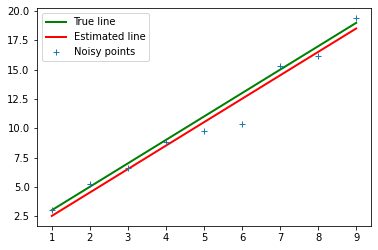

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

m = 2 # Line equation : y = m*x + c . m i s the s lope . c i s the int e r c ept .
c = 1
x = np.arange(1 ,10 , 1)
np.random.seed(45)
n = np.random.randn(len(x))
o = np.zeros(x.shape)
#o[-1] = 20
y = m*x + c + n + o

n=len(x)

u11 = np.sum((x - np.mean(x))**2)
u12 = np.sum((x - np.mean(x))*(y - np.mean(y)))
u21=u12
u22 =np.sum((y-np.mean(y))**2)
U= np.array([[u11,u12],[u21,u22]])
w, V =np.linalg.eig(U)
ev_corresponding_to_smalest_ev= V[:,np.argmin(w)]

a = ev_corresponding_to_smalest_ev[0]
b = ev_corresponding_to_smalest_ev[1]
d =a*np.mean(x) +b*np.mean(y)

mstar= -a/b
cstar= d/b

plt.plot([x[0],x[-1]],[m*x[0] +c,m*x[-1] +c],color='g',linewidth=2,label=r'True line')
plt.plot([x[0],x[-1]],[mstar*x[0] +cstar,mstar*x[-1] +cstar],color='r',linewidth=2,label=r'Estimated line')
plt.plot(x,y,"+",label="Noisy points")
plt.legend(loc='best')
